In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpig
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
import seaborn as sns
import numpy as np

In [28]:
IMG_PATH = 'Data/'
class_name = ['Desert', 'Forest']

Class : ['Desert', 'Forest']


In [7]:
img_data = ImageDataGenerator(
    rescale =  1./255,
    rotation_range = 0.45,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.2,
    fill_mode = 'nearest'
)

In [8]:
# Training
train = img_data.flow_from_directory(
    IMG_PATH, #Path folder
    target_size = (128,128),
    shuffle =True,
    class_mode = 'categorical',
    subset = 'training'
)


# Validation
validation = img_data.flow_from_directory(
    IMG_PATH, #Path folder
    target_size = (128,128),
    shuffle =True,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 642 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [19]:
# Simpan Gambar
img_generator = img_data.flow_from_directory(
    IMG_PATH, #Path folder
    target_size = (128,128), # Ukuran Gambar
    shuffle = True,
    class_mode = 'categorical',
    save_to_dir = 'augmentasi',
    save_format = 'jpg'
)

Found 802 images belonging to 2 classes.


In [10]:
# for i in range(5):
#     img, label = img_generator.next()
#     plt.imshow(img[0])
#     plt.title(class_name[tf.argmax(label[0])])
#     plt.axis('off')
#     plt.show

In [11]:
from keras import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [12]:
model = Sequential()

# Input Layer
model.add(Conv2D(256, (3,3), activation = 'relu', input_shape = [128,128,3]))

# Hidden Layer
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, 3, activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, 3, activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))

# Output Layer
model.add(Dense(2, activation = 'softmax'))

In [13]:
model.compile('adam','categorical_crossentropy',['accuracy'])

In [14]:
hasil = model.fit(train, epochs=10, validation_data = validation)

Epoch 1/10
21/21 [==============================] - 68s 3s/step - loss: 0.5770 - accuracy: 0.6682 - val_loss: 0.2643 - val_accuracy: 0.8625
Epoch 2/10
21/21 [==============================] - 65s 3s/step - loss: 0.0865 - accuracy: 0.9642 - val_loss: 0.0451 - val_accuracy: 0.9875
Epoch 3/10
21/21 [==============================] - 63s 3s/step - loss: 0.1290 - accuracy: 0.9564 - val_loss: 0.0599 - val_accuracy: 0.9812
Epoch 4/10
21/21 [==============================] - 70s 3s/step - loss: 0.0650 - accuracy: 0.9844 - val_loss: 0.2126 - val_accuracy: 0.9062
Epoch 5/10
21/21 [==============================] - 72s 3s/step - loss: 0.1000 - accuracy: 0.9579 - val_loss: 0.1315 - val_accuracy: 0.9500
Epoch 6/10
21/21 [==============================] - 70s 3s/step - loss: 0.0394 - accuracy: 0.9844 - val_loss: 0.0491 - val_accuracy: 0.9750
Epoch 7/10
21/21 [==============================] - 67s 3s/step - loss: 0.1667 - accuracy: 0.9455 - val_loss: 0.2388 - val_accuracy: 0.8875
Epoch 8/10
21/21 [==

In [15]:
evaluasi = model.evaluate(validation)
print(f'Test Loss    : {round(evaluasi[0] * 100,2)} %')
print(f'Test Akurasi : {round(evaluasi[1] * 100,2)} %')


5/5 [==============================] - 4s 727ms/step - loss: 0.0389 - accuracy: 0.9812
Test Loss    : 3.89 %
Test Akurasi : 98.12 %


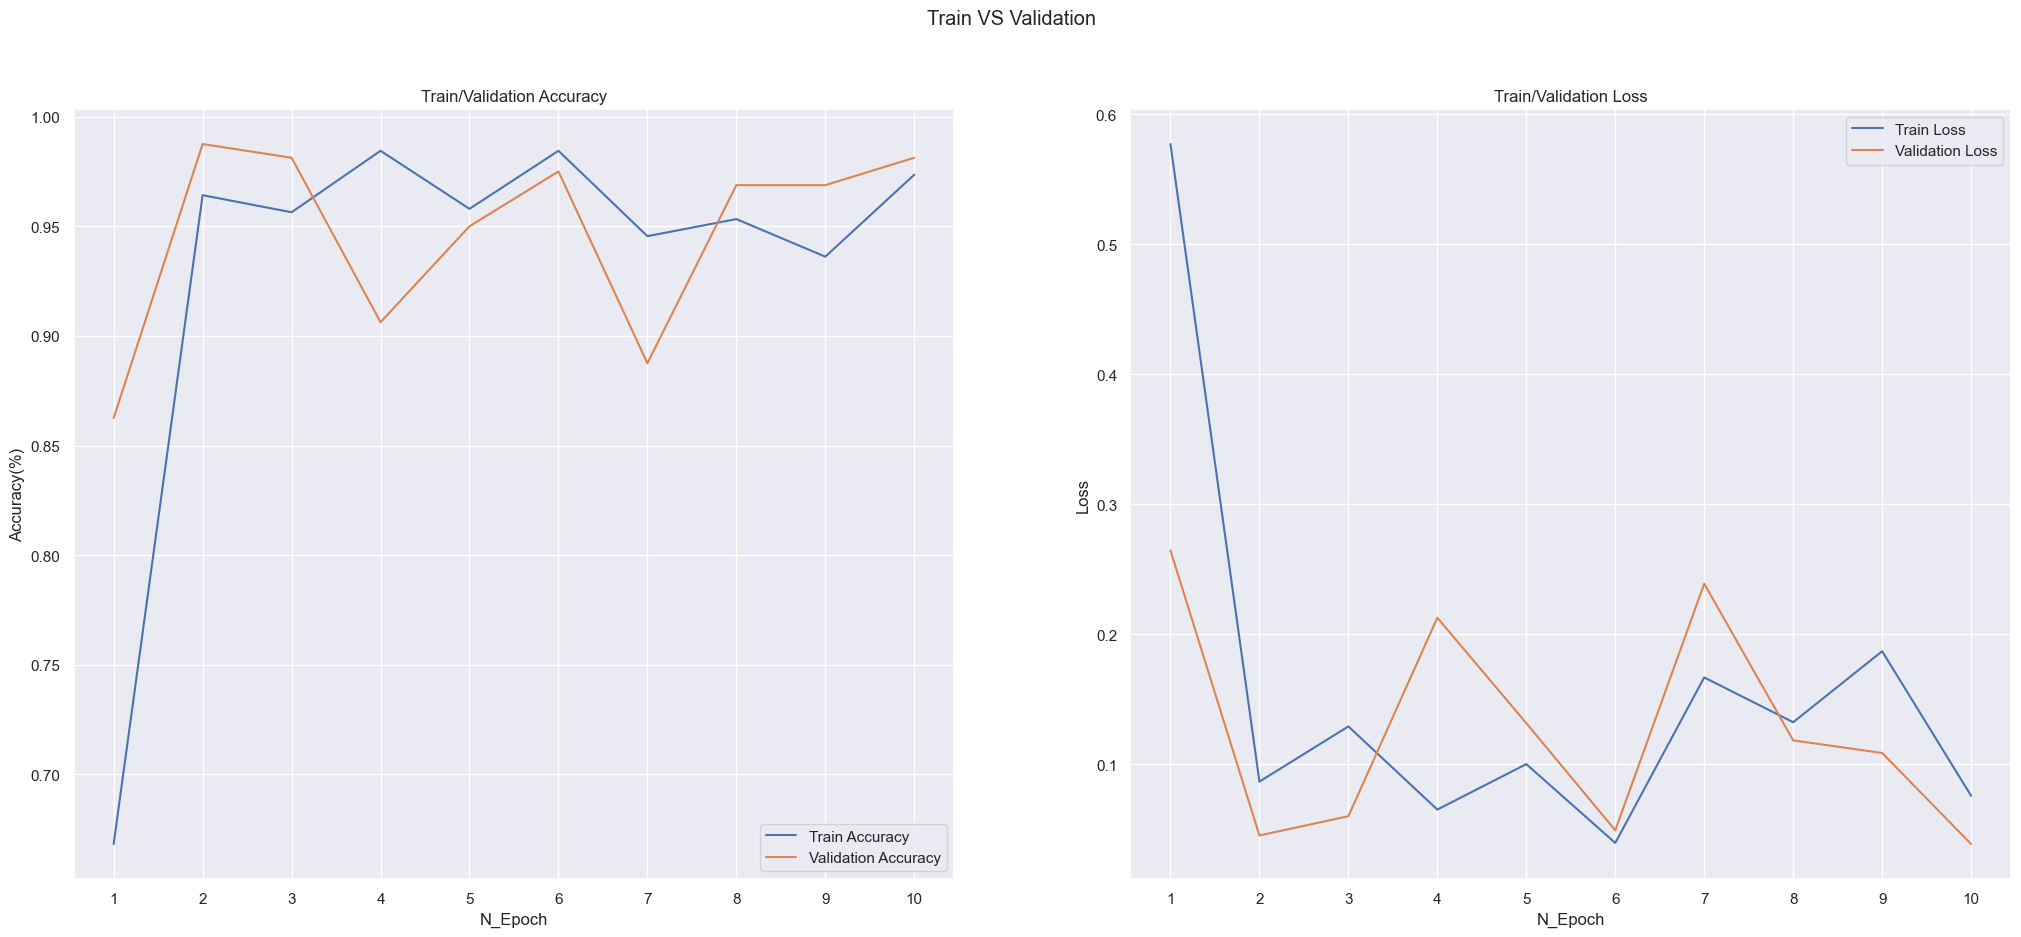

In [16]:
epoch = [i+1 for i in range(10)]

sns.set_theme()

plt.figure(figsize=(25, 10))
plt.suptitle('Train VS Validation')

#Subplot Akurasi
plt.subplot(1,2,1)
sns.lineplot(x=epoch,y = hasil.history['accuracy'],label ='Train Accuracy')
sns.lineplot(x=epoch,y = hasil.history['val_accuracy'],label ='Validation Accuracy')

plt.xticks(epoch)
plt.ylabel('Accuracy(%)')
plt.xlabel('N_Epoch')
plt.title("Train/Validation Accuracy")

#Subplot Loss
plt.subplot(1,2,2)
sns.lineplot(x=epoch,y = hasil.history['loss'],label ='Train Loss')
sns.lineplot(x=epoch,y = hasil.history['val_loss'],label ='Validation Loss')

plt.xticks(epoch)
plt.title("Train/Validation Loss")
plt.xlabel('N_Epoch')
plt.ylabel('Loss')
plt.show()

In [38]:
prediction = model.predict(train)
label_pre = np.argmax(prediction, axis=1)

21/21 [==============================] - 14s 662ms/step


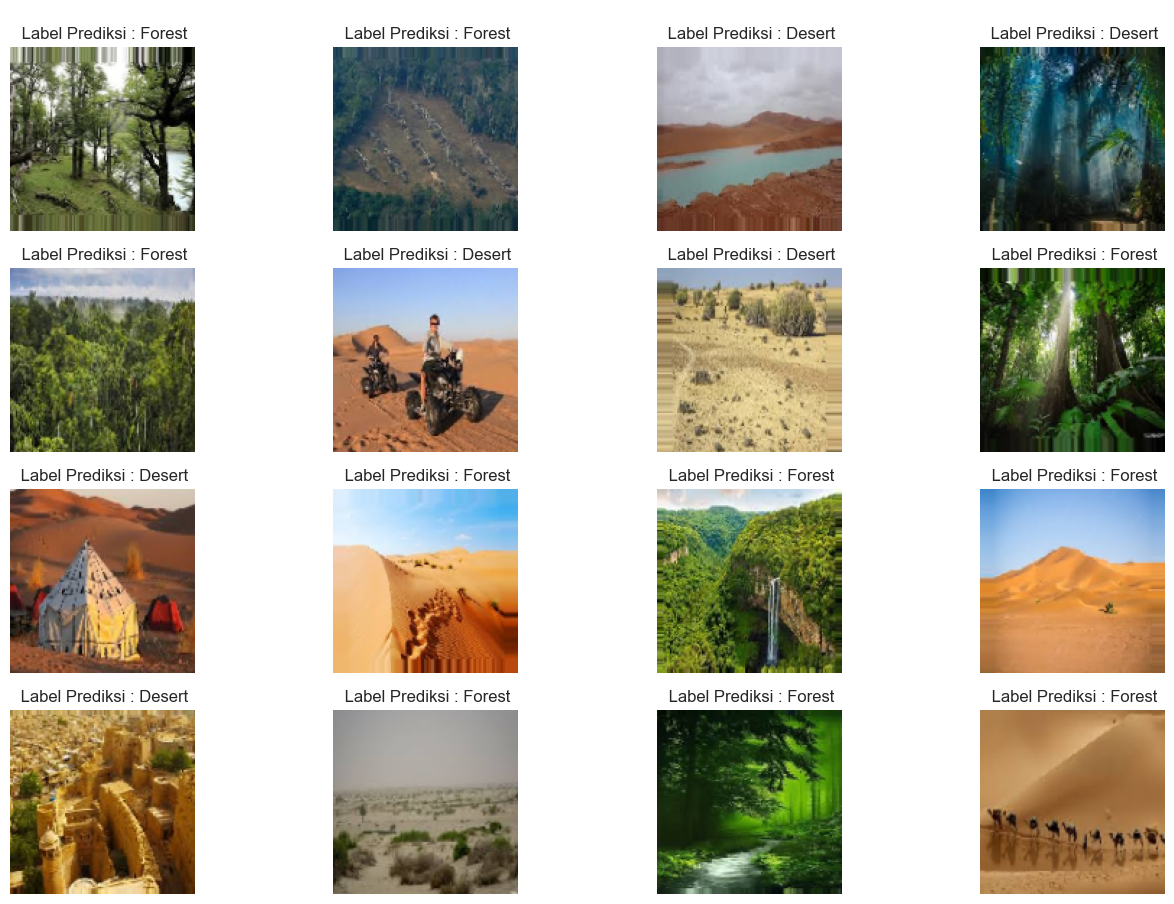

In [39]:
plt.figure(figsize=(16, 11))
for i in range(16):
    img, label = train.next()
    actual_label = class_name[np.argmax(label[0])]
    plt.subplot(4, 4, i+1)
    plt.title(f"\n Label Prediksi : {class_name[label_pre[i]]}")
    plt.axis('off')
    plt.imshow(img[0])
plt.show()

In [30]:
from keras.models import model_from_json
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('model/Desert_Forest_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
model.save_weights('model/Desert_Forest_weights.h5')